In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("clean_nus_sms.csv",index_col=0)
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


In [3]:
print("There are {} columns and {} rows".format(df.shape[1],df.shape[0]))

There are 5 columns and 48598 rows


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


* There are 3 missing values in `Message` variable compared to other variables
* All of the values in the DataFrame is strings, except for the `id` variable.
* There are 48598 messages present in the DataFrame.

### Text Preprocessing

In [5]:
# remove the row with missing message
df = df.dropna()
df.shape

(48595, 5)

Successfully removed the 3 blank messages.

#### Lower Casing Message Data

In [6]:
df["Message_clean"] = df["Message"].str.lower()
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


#### Remove the Punctuation

In [7]:
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","",PUNCT_TO_REMOVE))

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_punctuation(text))
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


#### Remove Stopwords

In [8]:
# view stopwords in english 
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

Removal of stopwords could potentially alter the meaning of some of the messages or alter the sentiment within them. I will leave these words in.

In [9]:
# checking whether there is existing of url in the message
url_pattern = r'(https?://\S+|www.\S+)'

# function checking the existing of urls
def contain_url(text):
    return re.search(url_pattern, text) is not None

# Apply the function
df["URL"] = df["Message_clean"].apply(lambda text:contain_url(text))
df

,id,Message,length,country,Date,Message_clean,URL
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,False
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,False
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,False
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,False
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,False
...,...,...,...,...,...,...,...
55828,45712,Come to me AFTER NOON,21,Serbia,2015/3,come to me after noon,False
55830,45714,I LOVE YOU TOO,14,Serbia,2015/3,i love you too,False
55831,45715,C-YA,4,Serbia,2015/3,cya,False
55833,45717,BE MY GUEST,11,Serbia,2015/3,be my guest,False


In [10]:
df["URL"].value_counts()

URL
False    48541
True        54
Name: count, dtype: int64

There are 54 messages consist of URL, Hence we need to remove the URL from the message

#### Remove URLs

In [11]:
def remove_url(text):
    url_pattern = re.compile(r'(https?://\S+|www.\S+)')
    return url_pattern.sub(r'', text)

df["Message_clean"] = df["Message_clean"].apply(lambda text:remove_url(text))
df.head()

,id,Message,length,country,Date,Message_clean,URL
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,False
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,False
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,False
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,False
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,False


In [12]:
df["URL"] = df["Message_clean"].apply(lambda text:contain_url(text))
df["URL"].value_counts()

URL
False    48595
Name: count, dtype: int64

Rerun the function to double check the existing of URLs. 
We can see that there is no URLs in the Messages

In [13]:
df.drop(["URL"], axis=1, inplace=True)
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


In [14]:
# Checking the existing of HTMLs
def contain_html(text):
    html_pattern = re.compile(r'<.*?>')
    return bool(re.search(html_pattern, text))

In [15]:
df["HTML"] = df["Message_clean"].apply(lambda text:contain_html(text))
df["HTML"].value_counts()

HTML
False    48595
Name: count, dtype: int64

In [16]:
df.drop(["HTML"], axis=1, inplace=True)
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


There is **no HTML found** in the message

### Removal of Frequent Words

In [17]:
from collections import Counter

cnt = Counter()

for text in df["Message_clean"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('i', 17396),
 ('to', 10623),
 ('u', 9839),
 ('you', 8773),
 ('the', 7992),
 ('haha', 6524),
 ('me', 4697),
 ('a', 4500),
 ('my', 4488),
 ('for', 4130)]

In [18]:
FREQWORD = set([w for (w,wc) in cnt.most_common(10)])

def remove_commonwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORD])

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_commonwords(text))
df.head()


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Removal of Rare Words

In [19]:
n_rare_words = 10
RAREWORDS = set([w for (w,wc) in cnt.most_common()[:-n_rare_words-1:-1]])

def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_rarewords(text))
df.head()


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Lemmatization

In [20]:
from nltk.corpus import wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer

def get_part_of_speech(text):
    probable_part_of_speech = wordnet.synsets(text)
    
    pos_counts = Counter()
    
    pos_counts['n'] = len([item for item in probable_part_of_speech if item.pos() == 'n'])
    pos_counts['v'] = len([item for item in probable_part_of_speech if item.pos() == 'v'])
    pos_counts['a'] = len([item for item in probable_part_of_speech if item.pos() == 'a'])
    pos_counts['r'] = len([item for item in probable_part_of_speech if item.pos() == 'r'])
    
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

In [21]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word,get_part_of_speech(word)) for word in text.split()])

df["Message_clean"]= df["Message_clean"].apply(lambda text:lemmatize_words(text))
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,dunno until when let go learn pilate
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekday get special price haiz cant e...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Tokenize Cleaned Message

In [22]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df["Message_tokenized"] =  df.apply(lambda x: nltk.word_tokenize(x["Message_clean"]), axis=1)
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\6917\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,Message,length,country,Date,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,dunno until when let go learn pilate,"[dunno, until, when, let, go, learn, pilate]"
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekday get special price haiz cant e...,"[den, only, weekday, get, special, price, haiz..."
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


In [23]:
df.to_csv("Preporcessed_Clean_NUS_sms.csv", header=True)

### Country Name

In [24]:
df["country"].nunique()

40

In [25]:
df["country"].value_counts()

country
Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Austra

In [26]:
# Removing the extra spaces from the beginning and end of country names
# Convert the first character of each word in a string to uppercase and other character to lowercase
df['country'] = df['country'].str.strip().str.title()

In [27]:
# Replace the country codes with full country names
country_code = {
    'Sg' : 'Singapore',
    'Uk' : 'United Kingdom',
    'My' : 'Malaysia',
    'Usa': 'United States',
    'Srilanka' : 'Sri Lanka'
}

df["country"] = df["country"].replace(country_code)

In [28]:
df["country"].nunique()

33

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# magic function for plotting in notebook
%matplotlib inline

<Axes: ylabel='country'>

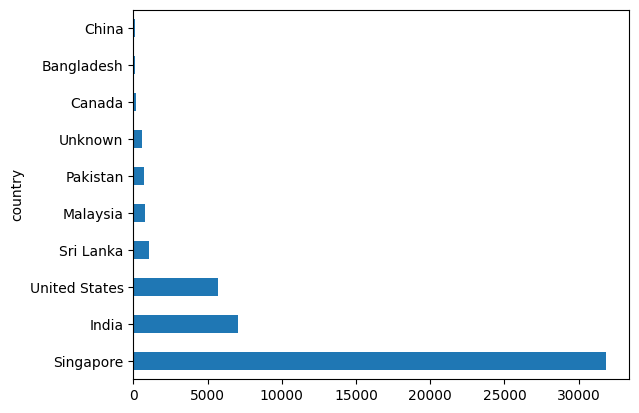

In [30]:
top_10_country = df["country"].value_counts().head(10)
top_10_country.plot.barh()

## Sentiment Analysis
**Naives Bayes Classification** will be used to determine the sentiment of messages in `Message` variable. This will involve using twitter data with known sentiments to create a classifier.

In [31]:
# download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\6917\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\6917\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\6917\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

After downloading the Twitter data from the `nltk` library, I will import it from nltk.corpus as twitter_samples

In [32]:
# import the twitter data
from nltk.corpus import twitter_samples

First step is to instantiate the tweets that have been labelled as positive and negative, in order to create a training that can be fed into the classifier

In [33]:
# Instantiate Positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate Negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [34]:
print(positive_tweets[:5])
print("\nThere are {} postive tweets.".format(len(positive_tweets)))

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

There are 5000 postive tweets.


In [35]:
print(negative_tweets[:5])
print("\nThere are {} negative tweets.".format(len(negative_tweets)))

['hopeless for tmr :(', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(", '@Hegelbon That heart sliding into the waste basket. :(', '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too', 'Dang starting next week I have "work" :(']

There are 5000 negative tweets.


The number of positive and negative samples used to assemble the training set is evenly distributed.
Next is to tokenize the tweets.

In [36]:
# create token from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tweet_tokens[0])

# create token from the negative tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


In [37]:
def count_urls_and_htmls(tweets):
    cnt_url = Counter()
    cnt_html = Counter()
    
    for tweet in tweets:
        for token in tweet:
            cleaned_url = contain_url(token)
            cnt_url[cleaned_url] += 1
            cleaned_html = contain_html(token)
            cnt_html[cleaned_html] += 1
    return cnt_url, cnt_html

In [38]:
cnt_url_pos, cnt_html_pos = count_urls_and_htmls(pos_tweet_tokens)
cnt_url_neg, cnt_html_neg = count_urls_and_htmls(neg_tweet_tokens)

Since the HTML tags and URLs are excluded in the SMS data, I'll check the existance of HTML and URLs in tweets.

In [39]:
print("Positive Tweets")
print("Consisting of URLs: False: {}; True: {}".format(cnt_url_pos[False], cnt_url_pos[True]))
print("Consisting of HTMLs: False: {}; True: {}".format(cnt_html_pos[False], cnt_html_pos[True]))
print("\nNegative Tweets")
print("Consisting of URLs: False: {}; True: {}".format(cnt_url_neg[False], cnt_url_neg[True]))
print("Consisting of HTMLs: False: {}; True: {}".format(cnt_html_neg[False], cnt_html_neg[True]))

Positive Tweets
Consisting of URLs: False: 65477; True: 1194
Consisting of HTMLs: False: 66671; True: 0

Negative Tweets
Consisting of URLs: False: 62814; True: 567
Consisting of HTMLs: False: 63381; True: 0


We can see that 0 HTML are found; 1194 and 567 URLs found in positive and negative tweets.

In [40]:
def remove_urls_and_htmls(tweets):
    cleaned_tokens = [] 
    
    for tweet in tweets:
        cleaned_tweet = []
        for token in tweet:
            cleaned_token = remove_url(token) 
            cleaned_tweet.append(cleaned_token)
        cleaned_tokens.append(cleaned_tweet) 
    
    return cleaned_tokens

In [41]:
cleaned_pos_tweets = remove_urls_and_htmls(pos_tweet_tokens)
cleaned_neg_tweets = remove_urls_and_htmls(neg_tweet_tokens)

In [42]:
print(cleaned_pos_tweets[0])
print(cleaned_neg_tweets[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


In [43]:
cnt_url_pos, cnt_html_pos = count_urls_and_htmls(cleaned_pos_tweets)
cnt_url_neg, cnt_html_neg = count_urls_and_htmls(cleaned_neg_tweets)

print("Positive Tweets")
print("Consisting of URLs: False: {}; True: {}".format(cnt_url_pos[False], cnt_url_pos[True]))
print("Consisting of HTMLs: False: {}; True: {}".format(cnt_html_pos[False], cnt_html_pos[True]))
print("\nNegative Tweets")
print("Consisting of URLs: False: {}; True: {}".format(cnt_url_neg[False], cnt_url_neg[True]))
print("Consisting of HTMLs: False: {}; True: {}".format(cnt_html_neg[False], cnt_html_neg[True]))

Positive Tweets
Consisting of URLs: False: 66671; True: 0
Consisting of HTMLs: False: 66671; True: 0

Negative Tweets
Consisting of URLs: False: 63381; True: 0
Consisting of HTMLs: False: 63381; True: 0


We can see that there is no URLs and HTMLs in positive and negative tweets.

In [44]:
# Create a list of all the tweets
list_of_all_tweets = cleaned_pos_tweets + cleaned_neg_tweets

# flatten the list of lists into a single list
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

# print(list_of_all_tweets)
# Check how many words that is
print("There are {} words.".format(len(all_tweet_tokens)))

There are 130052 words.


In [45]:
# create a frequency distributions of all the words
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

print(all_tokens)
print(len(all_tokens))
print(all_tokens.most_common(10))

# select top 10,000 features to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

# Check out the list
print(sentiment_features[:10])

<FreqDist with 22684 samples and 130052 outcomes>
22684
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]
[':(', ':)', '!', 'I', '.', 'to', 'you', 'the', '', ',']


Now I need to create a feature extractor that identifies when a feature is present in a message.

In [46]:
def document_features(document, sentiment_features):
    # make a set list of all the tokens in message
    document_tokens = set(document)
    features = {}
    # for all the features, check if that feature is in my target message
    for token in sentiment_features:
        features[token] = (token in document_tokens)
    return features

# test it on a sample
test_sentence = "I am super super hungry now :(".split(" ")
print(test_sentence)
print("\n")
print(document_features(test_sentence, sentiment_features))

['I', 'am', 'super', 'super', 'hungry', 'now', ':(']


{':(': True, ':)': False, '!': False, 'I': True, '.': False, 'to': False, 'you': False, 'the': False, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': False, 'is': False, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': False, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': True, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False,

Now is time to seperate 70% of the tweets to be training set and 30% for testing set. Using the `random` library, I can randomly select the tweets for each

In [47]:
import random

# create the positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet,"Positive") for tweet in cleaned_pos_tweets]
negative_tw = [(tweet,"Negative") for tweet in cleaned_neg_tweets]

# create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

# initialize the random number so I get the same results everytime
random.seed(42)
# shuffle the order of the dataset
random.shuffle(all_labeled_tweets)

# create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
# seperate the datasets into training and testing set
train_set, test_set = feature_set[:7000], feature_set[7000:]

**`NaiveBayesClassifier`** model will be used to build the sentiment model. I will use the clasify() function to test the performance of my model on my training set.

In [48]:
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data 
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is: ", classify.accuracy(classifier, test_set))

# show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is:  0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True          

Now this model is ready to classify the sentiment of message.

In [49]:
# Select one sampel message to evaluate
sample_message = str(df["Message_tokenized"][49])
print(sample_message)

# print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Negative


The sentiment of the 50th message (`"yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke"`) is Negative per my model.

Now I will evaluate all the messages in the NUS SMS Corpus.

In [50]:
# create an empty list
sentiments = []

# Iterate through the column and predict each response's sentiment, append
# sentiment to new list
for message in df["Message_tokenized"]:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))
    
# add the list back to the DataFrame
df["Sentiment"] = sentiments

df["Sentiment"].value_counts(normalize=True)

Sentiment
Negative    0.635703
Positive    0.364297
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment', ylabel='count'>

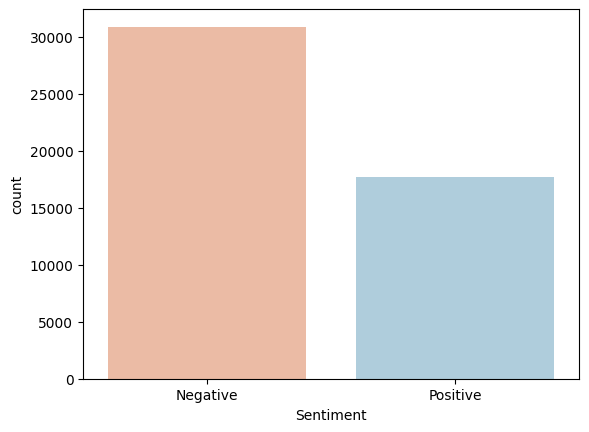

In [51]:
# view the distribution in countplot
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

sns.countplot(x="Sentiment", data=df, palette='RdBu')

We can see that 63.6% of the messages in the NUS SMS Corpus are Negative.
Now that we can compare by country. 

To make it easier, the sentiment will be transform into numeric variable. Positive message will be **"1"** and negative message will be **"-1"**

In [52]:
def convert_sentiment(sentiment):
    if sentiment == "Positive":
        return 1
    else:
        return -1
    
df["Sentiment_score"] = df["Sentiment"].apply(convert_sentiment)

df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,dunno until when let go learn pilate,"[dunno, until, when, let, go, learn, pilate]",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekday get special price haiz cant e...,"[den, only, weekday, get, special, price, haiz...",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


Now will group by country and use the **.mean()** method to get the average sentiment score for each country

In [53]:
df_sent = df.groupby(['country'])['Sentiment_score'].mean().reset_index()
#df_sent.reset_index(inplace=True)
df_sent.head()

,country,Sentiment_score
0,Australia,-0.111111
1,Bangladesh,-0.126984
2,Barbados,-0.750000
3,Canada,-0.313131
4,China,-0.009346


In [54]:
# to know which country send the most positive messages
df_sent_sorted = df_sent.sort_values(by="Sentiment_score", ascending=False)
df_sent_sorted

,country,Sentiment_score
28,Trinidad And Tobago,0.800000
12,Kenya,0.400000
18,New Zealand,0.200000
20,Pakistan,0.155792
17,Nepal,0.128205
16,Morocco,0.111111
6,Ghana,0.111111
30,United Kingdom,0.050000
32,Unknown,-0.006645
8,India,-0.007198


<Axes: xlabel='country', ylabel='Sentiment_score'>

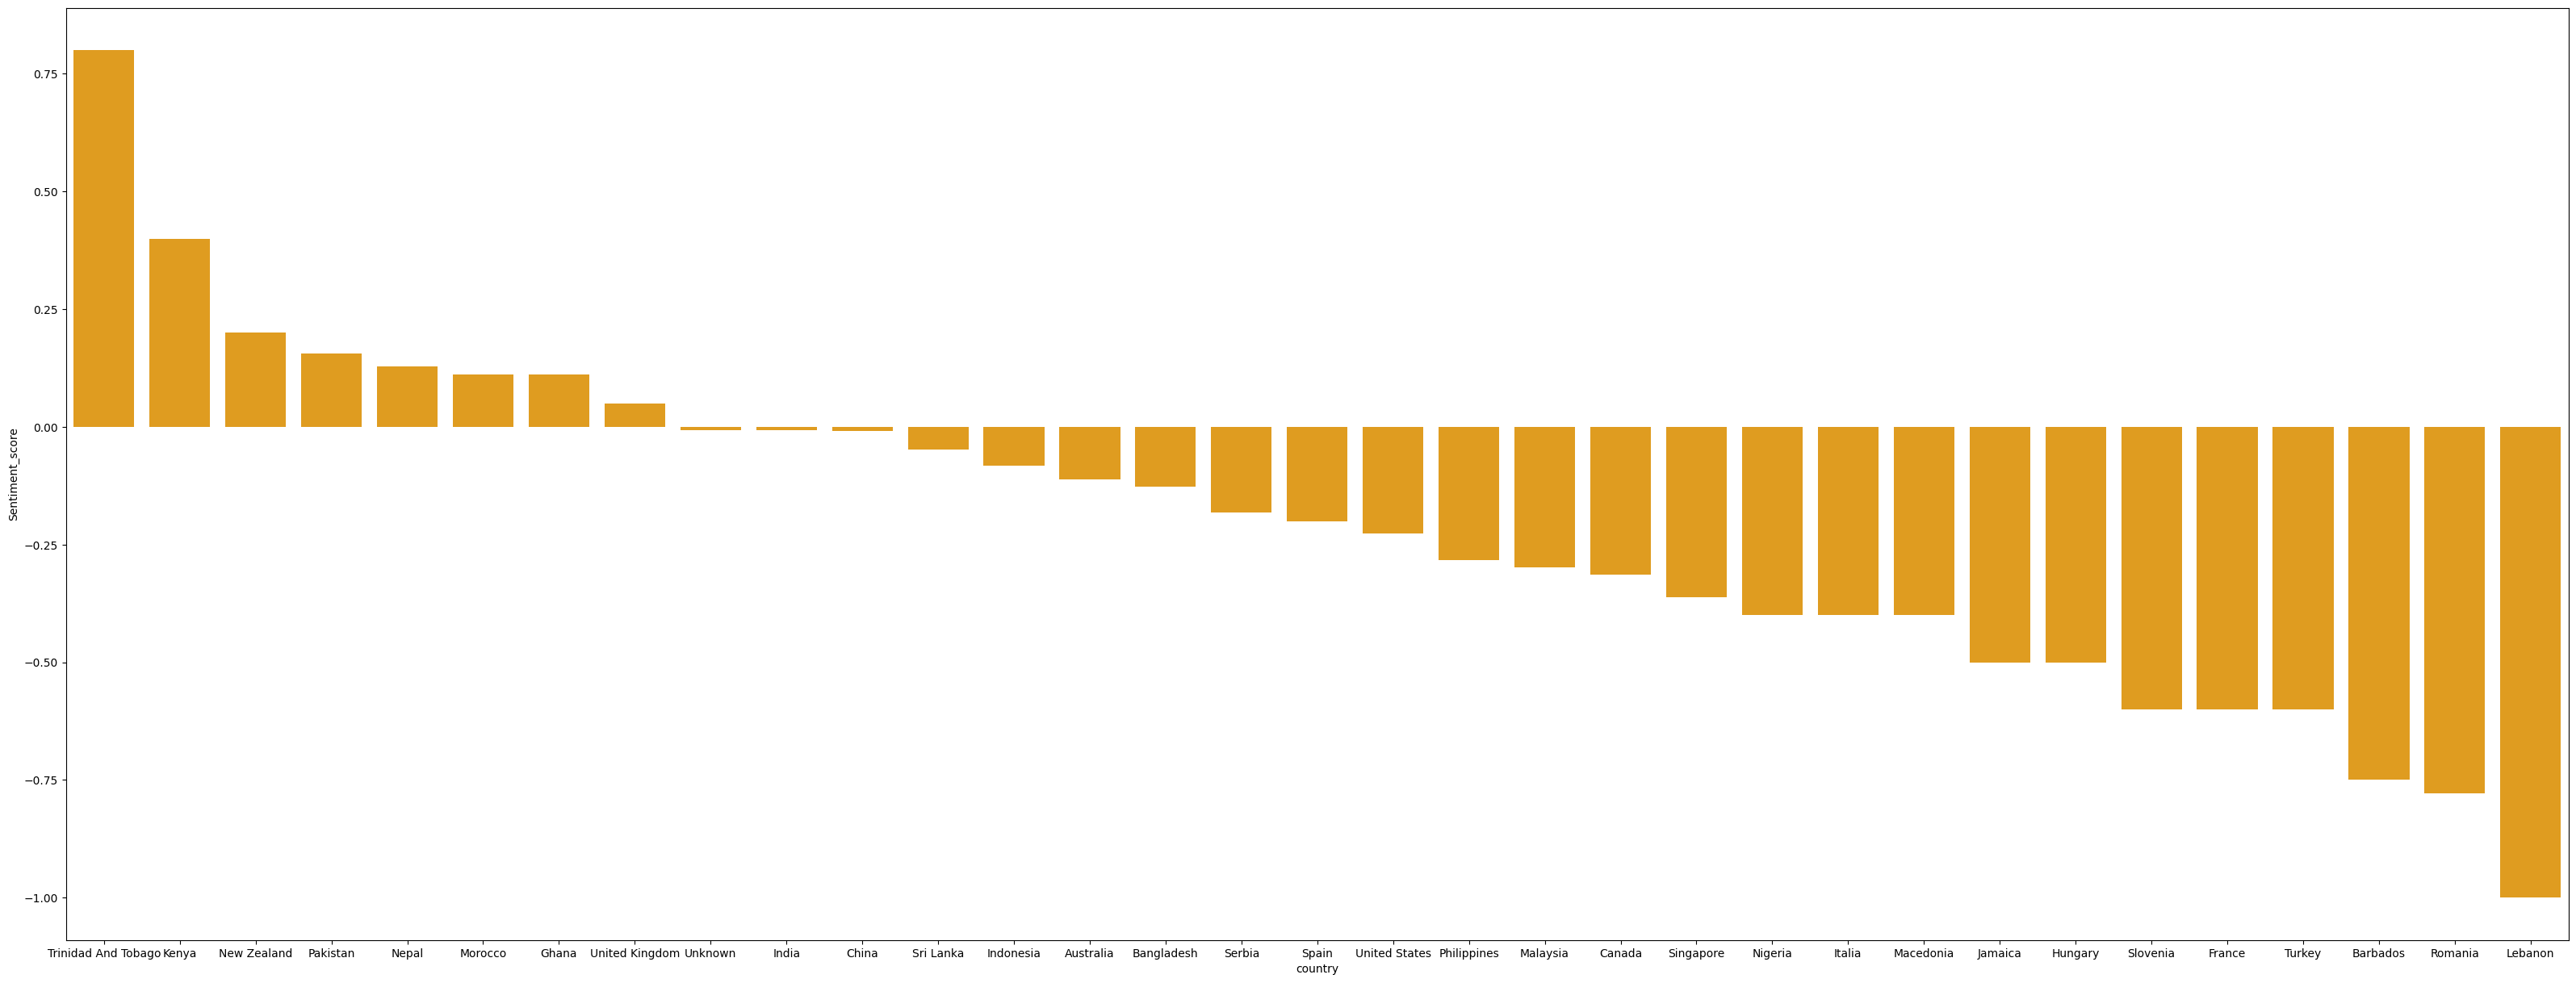

In [55]:
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent_sorted, ax=ax, color="orange")
